In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# droping Unnamed columns

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
df['v1'] = df['v1'].replace({'spam':1,'ham':0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
df.duplicated().sum()

403

In [11]:
# droping duplicate columns

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [14]:
# EDA

<AxesSubplot:ylabel='v1'>

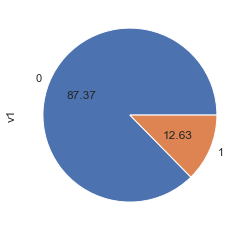

In [15]:
df['v1'].value_counts().plot(kind='pie',autopct='%0.2f')

In [16]:
# we can see that 87.37 % messages are ham and 12.63% are spam. 

In [17]:
# Making some columns

In [18]:
import nltk

In [19]:
df['num_characters'] = df['v2'].apply(len)

In [20]:
df.head()

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,v1,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


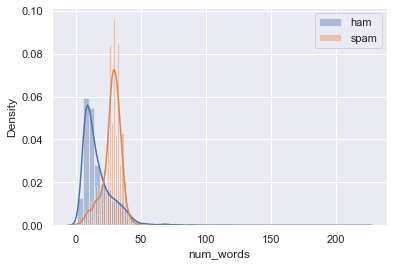

In [26]:
sns.distplot(df[df['v1']==0]['num_words'],label='ham')
sns.distplot(df[df['v1']==1]['num_words'],label='spam')
plt.legend()
plt.show()

# we can see that if number of words are between 0-25 so, there is high chance that will be ham and if num_words are >25 it may be a spam message

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


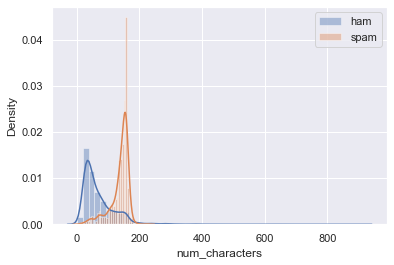

In [27]:
sns.distplot(df[df['v1']==0]['num_characters'],label='ham')
sns.distplot(df[df['v1']==1]['num_characters'],label='spam')
plt.legend()
plt.show()

# we can see that if number of characters  are between 0-120 so, there is high chance that will be ham and if num_words are >120 it may be a spam message

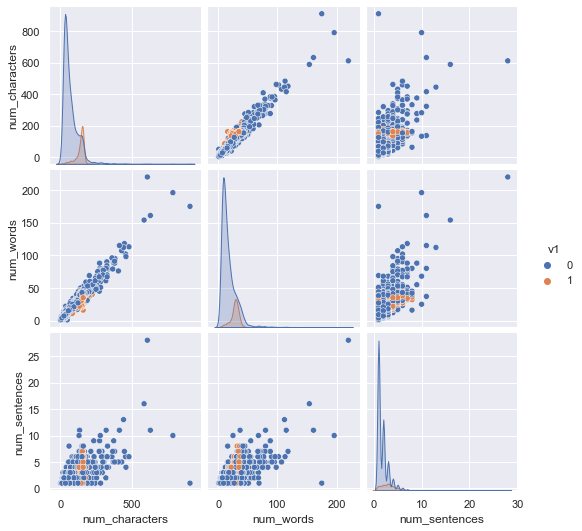

In [28]:
sns.pairplot(df,hue='v1')

<AxesSubplot:>

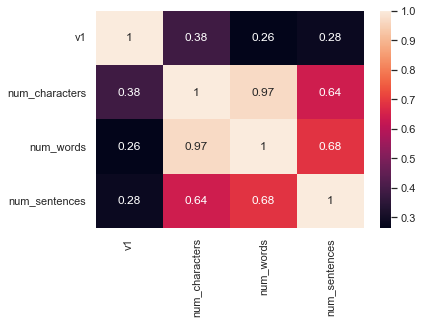

In [29]:
sns.heatmap(df.corr(),annot=True)

# we can see that columns num_words,num_sentence,num_charactera are highly correlaterd each other and they cause multicolinrearity so,we chose only one column that is num_chatracters because it is highly correlation with target column v1

# TEXT PREPROCESSING

In [30]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english")) 

In [32]:
def clean_text(x):
    x = re.sub(r"[-()\"#/@;:<>{}`+=~|!?,₹&'$%]", " ", x)
    x = re.sub('[0-9]+',' ',x)
    x = re.sub(r'\s+',' ',x)
    x= x.lower()
    x = [lemmatizer.lemmatize(token) for token in x.split(" ")]
    x = [lemmatizer.lemmatize(token, "v") for token in x]
    x = [word for word in x if not word in stop_words]
    x = " ".join(x)
    return x

In [33]:
df['text'] = df['v2'].apply(clean_text)

In [34]:
df.head()

,v1,v2,num_characters,num_words,num_sentences,text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy.. available bugis n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [35]:
df['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [36]:
df['text'][10]

'gonna home soon want talk stuff anymore tonight k cry enough today.'

In [37]:
# ham words

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
ham = wc.generate(df[df['v1']==0]['text'].str.cat(sep=' '))

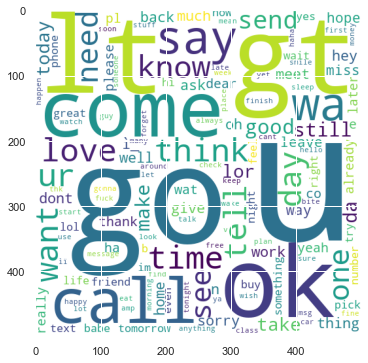

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(ham)

In [41]:
# spam words
spam = wc.generate(df[df['v1']==1]['text'].str.cat(sep=' '))

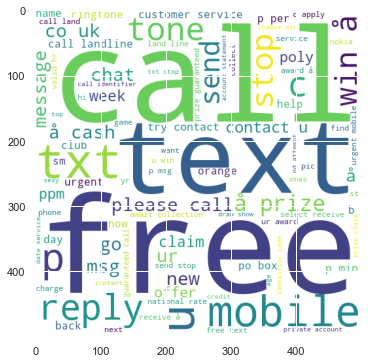

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam)

# finding most frequent word

In [43]:
# 1. ham

In [44]:
ham_words = []
for i in df[df['v1']==0]['text'].tolist():
    for j in i.split():
        ham_words.append(j)

In [45]:
len(ham_words)

37088

In [46]:
from collections import Counter # it creat a dictionary and show frequency of a word

In [47]:
pd.DataFrame(Counter(ham_words).most_common(30))

,0,1
0,u,913
1,get,576
2,go,485
3,gt,288
4,lt,286
5,come,285
6,.,259
7,know,233
8,like,228
9,call,219


C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


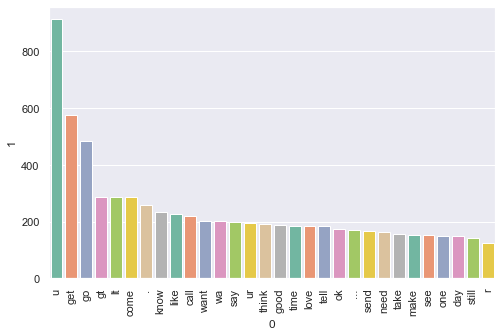

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# 2. spam

In [50]:
spam_words = []
for i in df[df['v1']==1]['text'].tolist():
    for j in i.split():
        spam_words.append(j)

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


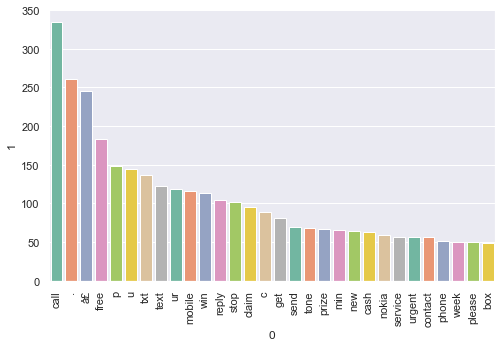

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
x = tfidf.fit_transform(df['text']).toarray()

In [84]:
y = df['v1'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [89]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [90]:
# GaussionNB
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.867504835589942
0.525
0.6478149100257069


In [91]:
# MultinomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9680851063829787
1.0
0.8754716981132076


In [78]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [92]:
rf = RandomForestClassifier()
ec = ExtraTreesClassifier()

In [93]:
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))

0.9777562862669246
1.0
0.9163636363636364


In [94]:
ec.fit(x_train,y_train)
y_pred5 = ec.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(f1_score(y_test,y_pred5))

0.9816247582205029
1.0
0.931899641577061


In [95]:
# we can see that Extratree regressor giving good precision as well as good f1 score , so we pic that model

In [96]:
import pickle

In [97]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(ec,open('model.pkl','wb'))